# Case Study - customerspends.csv - Product Segmentation

An online grocery store has captured amount spent per annum (in Indian Rupee) by 20 customers on apparel and beauty and healthcare products and given in the file customerspends.csv it contains the following records. 

- Customer Customer ID 
- Apparel Amount spent in apparel products
- Beauty and Healthcare amount spent in beauty and healthcare products 


In [1]:
#1. create a scatter plot to depict the customer spends on apparel and beauty and healthcare products and identify number of clusters existing in the dataset.

In [2]:
# 1. Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

In [3]:
# 2. Read the dataset beer.csv

customers = pd.read_csv('customerspends.csv')
customers.info()
customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer               20 non-null     int64  
 1   Apparel                20 non-null     float64
 2   Beauty and Healthcare  20 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 608.0 bytes


,Customer,Apparel,Beauty and Healthcare
0,1,21.10,0.7
1,2,15.23,5.5
2,3,5.22,18.6
3,4,31.10,1.8
4,5,6.12,21.5


In [4]:
# 3. Standardize numeric features

scaled_customers = StandardScaler().fit_transform(customers[['Customer','Apparel','Beauty and Healthcare']])
scaled_customers[0:5]

array([[-1.64750894,  0.892371  , -1.26688022],
       [-1.47408695,  0.20647107, -0.59775334],
       [-1.30066495, -0.96318111,  1.22840542],
       [-1.12724296,  2.06085469, -1.11353864],
       [-0.95382097, -0.85801758,  1.63266957]])

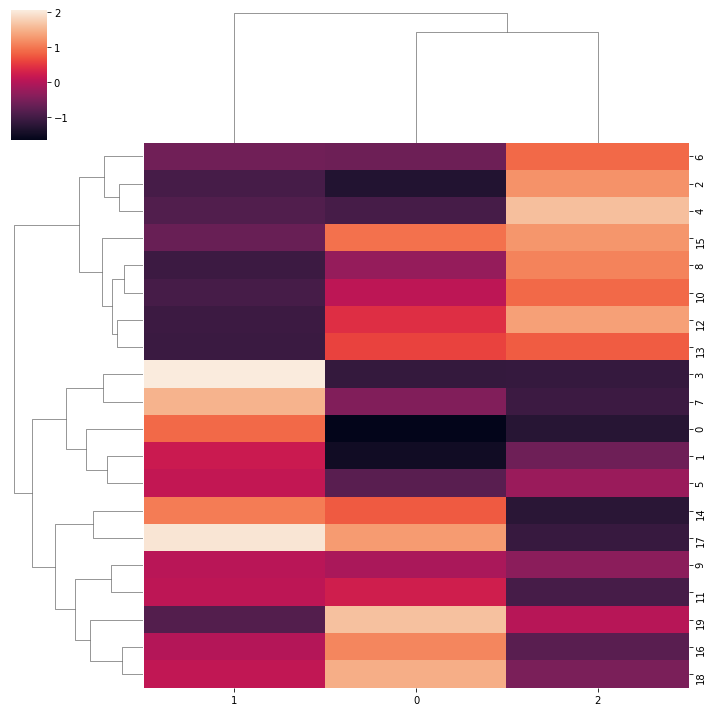

In [5]:
# 4. Draw Dendrogram

sns.clustermap(scaled_customers)

In [6]:
# 5. Display similar & dis-similar instances

print("Similar Instances     :\n",customers.loc[[12,13]])
print("Dis-similar Instances :\n",customers.loc[[6,18]])

Similar Instances     :
     Customer  Apparel  Beauty and Healthcare
12        13     4.40                   19.4
13        14     4.25                   15.5
Dis-similar Instances :
     Customer  Apparel  Beauty and Healthcare
6          7      8.5                  16.20
18        19     14.4                   6.28


In [7]:
# 6. Elbow Method - variance explained by the clusters is plotted against the no. of clusters

cluster_error = []
cluster_range = range(1,10)
for i in cluster_range:
    clust = KMeans(i).fit(scaled_customers)
    cluster_error.append(clust.inertia_)  # inertia_ in python - wcss

Text(0.5, 1.0, 'Elbow Diagram')

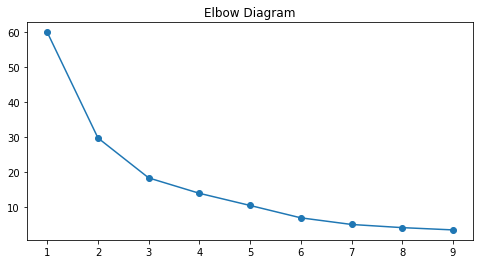

In [8]:
# Plot - Elbow method outcome

plt.figure(figsize=(8,4))
plt.plot(cluster_range, cluster_error, marker = "o")
plt.title("Elbow Diagram")

**Interpretation**

- Elbow point is at 2
- Indicates that there might be 2 clusters existing in the dataset 

In [9]:
# 7. Set K=3 & run KMeans algorithm - Create a new column clusterid to capture the cluster number it is assigned to 

clust2 = KMeans(2, random_state = 42).fit(scaled_customers)
customers["clusterid"] = clust2.labels_ 
customers.head()

,Customer,Apparel,Beauty and Healthcare,clusterid
0,1,21.10,0.7,1
1,2,15.23,5.5,1
2,3,5.22,18.6,0
3,4,31.10,1.8,1
4,5,6.12,21.5,0


In [11]:
# 8. Print dimensions of each new cluster created

print("Cluster 0 Dimensions: \t",customers[customers.clusterid==0].shape)
print("Cluster 1 Dimensions: \t",customers[customers.clusterid==1].shape)

Cluster 0 Dimensions: 	 (9, 4)
Cluster 1 Dimensions: 	 (11, 4)


In [12]:
# 9. Print instances cluster-wise (0, & 1)

print("Cluster 0\n",customers[customers.clusterid==0],"\n")
print("Cluster 1\n",customers[customers.clusterid==1],"\n")

Cluster 0
     Customer  Apparel  Beauty and Healthcare  clusterid
2          3     5.22                  18.60          0
4          5     6.12                  21.50          0
6          7     8.50                  16.20          0
8          9     4.34                  17.70          0
10        11     5.20                  16.20          0
12        13     4.40                  19.40          0
13        14     4.25                  15.50          0
15        16     7.90                  18.80          0
19        20     6.25                   9.98          0 

Cluster 1
     Customer  Apparel  Beauty and Healthcare  clusterid
0          1    21.10                   0.70          1
1          2    15.23                   5.50          1
3          4    31.10                   1.80          1
5          6    14.50                   8.20          1
7          8    26.50                   2.20          1
9         10    13.75                   7.30          1
11        12    14.20   

In [14]:
# 10. Hierarchical clustering - Store cluster labels in varible h_clusterid

h_clusters = AgglomerativeClustering(2).fit(scaled_customers)
customers["h_clusterid"] = h_clusters.labels_ 
customers[0:5]

,Customer,Apparel,Beauty and Healthcare,clusterid,h_clusterid
0,1,21.10,0.7,1,0
1,2,15.23,5.5,1,0
2,3,5.22,18.6,0,1
3,4,31.10,1.8,1,0
4,5,6.12,21.5,0,1


In [15]:
# 11. Print dimensions of each new cluster created

print("Cluster 0 Dimensions: \t",customers[customers.h_clusterid==0].shape)
print("Cluster 1 Dimensions: \t",customers[customers.h_clusterid==1].shape)

Cluster 0 Dimensions: 	 (12, 5)
Cluster 1 Dimensions: 	 (8, 5)


In [16]:
# 12. Compare the clusters created by k-means & hierarchical clustering
#     Print each cluster independently & interpret the characteristic of each cluster
#     Print instances cluster-wise (0, 1, & 2)

print("Cluster 0\n",customers[customers.h_clusterid==0],"\n")
print("Cluster 1\n",customers[customers.h_clusterid==1],"\n")

Cluster 0
     Customer  Apparel  Beauty and Healthcare  clusterid  h_clusterid
0          1    21.10                   0.70          1            0
1          2    15.23                   5.50          1            0
3          4    31.10                   1.80          1            0
5          6    14.50                   8.20          1            0
7          8    26.50                   2.20          1            0
9         10    13.75                   7.30          1            0
11        12    14.20                   2.90          1            0
14        15    22.30                   0.90          1            0
16        17    13.40                   4.20          1            0
17        18    30.60                   1.90          1            0
18        19    14.40                   6.28          1            0
19        20     6.25                   9.98          0            0 

Cluster 1
     Customer  Apparel  Beauty and Healthcare  clusterid  h_clusterid
2         